# MNIST fashion data set

## MNIST fashion data set

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Exploring the format of the MNIST fashion data set

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

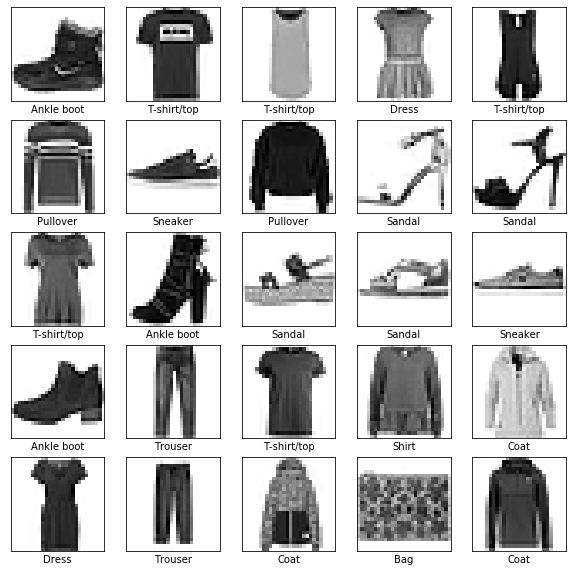

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

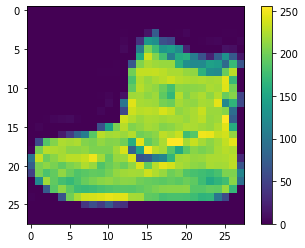

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Prepare the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# 1 Underfit Model

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/sample - loss: 2.0666 - acc: 0.2127 - val_loss: 1.7404 - val_acc: 0.2893
Epoch 2/20
60000/60000 [==============================] - 3s 54us/sample - loss: 1.6961 - acc: 0.2715 - val_loss: 1.6552 - val_acc: 0.2648
Epoch 3/20
60000/60000 [==============================] - 3s 56us/sample - loss: 1.6372 - acc: 0.2997 - val_loss: 1.6336 - val_acc: 0.2965
Epoch 4/20
60000/60000 [==============================] - 3s 56us/sample - loss: 1.6110 - acc: 0.3040 - val_loss: 1.5904 - val_acc: 0.3210
Epoch 5/20
60000/60000 [==============================] - 3s 56us/sample - loss: 1.6039 - acc: 0.3004 - val_loss: 1.5920 - val_acc: 0.3126
Epoch 6/20
60000/60000 [==============================] - 3s 57us/sample - loss: 1.5812 - acc: 0.3156 - val_loss: 1.5901 - val_acc: 0.3167
Epoch 7/20
60000/60000 [==============================] - 3s 57us/sample - loss: 1.5777 - acc: 0.3169 - val_loss: 1.

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 1.5066 - acc: 0.3636
Test accuracy: 0.3636


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

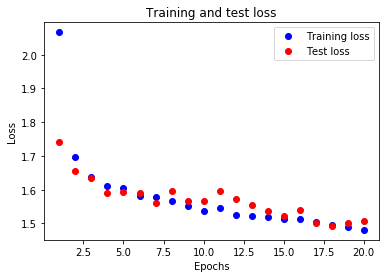

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

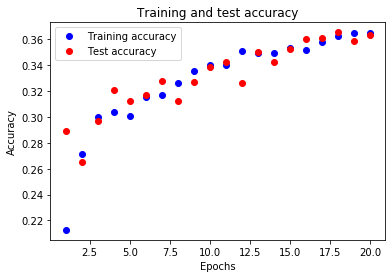

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The underfit model has very low accuracy that stays fairly consistent and does not improve much with each iteration.

# 2 Overfit Model

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 215us/sample - loss: 1.6999 - acc: 0.7832 - val_loss: 0.6040 - val_acc: 0.7935
Epoch 2/20
60000/60000 [==============================] - 13s 216us/sample - loss: 0.4724 - acc: 0.8322 - val_loss: 0.5135 - val_acc: 0.8190
Epoch 3/20
60000/60000 [==============================] - 13s 215us/sample - loss: 0.4274 - acc: 0.8483 - val_loss: 0.4573 - val_acc: 0.8384
Epoch 4/20
60000/60000 [==============================] - 13s 211us/sample - loss: 0.4038 - acc: 0.8554 - val_loss: 0.4786 - val_acc: 0.8194
Epoch 5/20
60000/60000 [==============================] - 13s 214us/sample - loss: 0.3773 - acc: 0.8658 - val_loss: 0.4806 - val_acc: 0.8334
Epoch 6/20
60000/60000 [==============================] - 13s 223us/sample - loss: 0.3556 - acc: 0.8722 - val_loss: 0.4190 - val_acc: 0.8562
Epoch 7/20
60000/60000 [==============================] - 13s 217us/sample - loss: 0.3502 - acc: 0.8758 

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.4290 - acc: 0.8692
Test accuracy: 0.8692


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

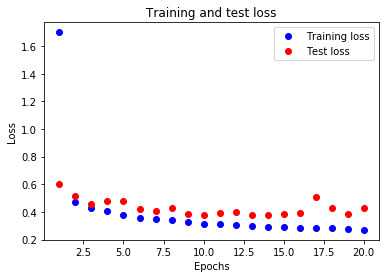

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

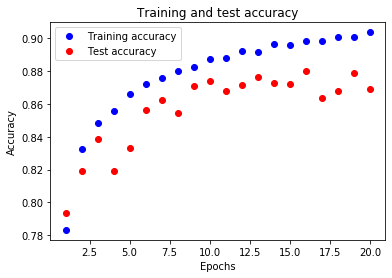

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This overfit model produces high accuracy for the training data and exceeds the testing data before the final iteration.

# 3 Pretty Good Model

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 247us/sample - loss: 1.9385 - acc: 0.7532 - val_loss: 0.5021 - val_acc: 0.8169
Epoch 2/20
60000/60000 [==============================] - 15s 253us/sample - loss: 0.5074 - acc: 0.8190 - val_loss: 0.4585 - val_acc: 0.8381
Epoch 3/20
60000/60000 [==============================] - 15s 242us/sample - loss: 0.4622 - acc: 0.8330 - val_loss: 0.4387 - val_acc: 0.8457
Epoch 4/20
60000/60000 [==============================] - 15s 249us/sample - loss: 0.4320 - acc: 0.8436 - val_loss: 0.4240 - val_acc: 0.8439
Epoch 5/20
60000/60000 [==============================] - 16s 262us/sample - loss: 0.4198 - acc: 0.8485 - val_loss: 0.4186 - val_acc: 0.8514
Epoch 6/20
60000/60000 [==============================] - 15s 251us/sample - loss: 0.4034 - acc: 0.8552 - val_loss: 0.4081 - val_acc: 0.8594
Epoch 7/20
60000/60000 [==============================] - 15s 251us/sample - loss: 0.3888 - acc: 0.8594 

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.3835 - acc: 0.8675
Test accuracy: 0.8675


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

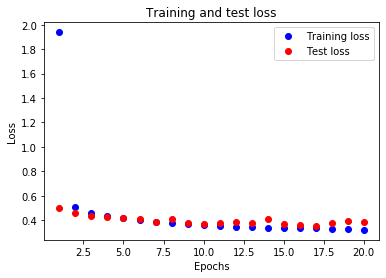

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

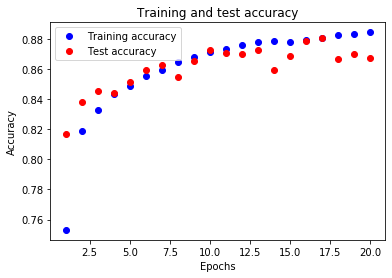

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

To create a pretty good model, the overfit model was used as a base in combination with a dropout.

Despite the close resemblance to the overfit model, the pretty good model has a smaller gap between the testing and training accuracies which implies less overfitting.